<h1 align=center><font size=5>Annual Report on The Performance of Bike Sharing Services for 2020</font></h1>

<img src = "https://www.moneycrashers.com/wp-content/uploads/2018/12/bike-sharing-best-bike-share-programs-1068x713.jpg" width = 450, align = "center">

<h3>1. Introduction</h3>

The bike sharing service dataset shows amount of bikes rented everyday in 2020

In this data set there are 13 columns. Their names and data types as follows:
- date : date
- season : season 
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weather : weather of the day
- temp : Normalized temperature in Celsius. 
- atemp: Normalized feeling temperature in Celsius.
- humidity: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- trips: count of total rental bikes including both casual and registered


In [1]:
#Basic libraries
import pandas as pd
import datetime

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bike_sharing_daily_data.csv')

In [3]:
df.head()

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips
0,2020-01-01,Spring,0,6,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2020-01-02,Spring,0,0,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2020-01-03,Spring,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2020-01-04,Spring,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2020-01-05,Spring,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        731 non-null    object 
 1   season      731 non-null    object 
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weather     731 non-null    object 
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  casual      731 non-null    int64  
 11  registered  731 non-null    int64  
 12  trips       731 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 65.7+ KB


Based on the Range Index, there are 731 entries in the dataset

Non-Null Count shows all column in the dataset have 731 entries, meaning there's no null value

In [5]:
# change data type
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

# get month and datecolumn for the spesific detail for data
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

<h4>Filter Dataset only for 2020</h4>

In [6]:
filtered_df = df.loc[(df['date'] >= '2020-01-01')
                     & (df['date'] < '2021-01-01')]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        366 non-null    datetime64[ns]
 1   season      366 non-null    object        
 2   holiday     366 non-null    int64         
 3   weekday     366 non-null    int64         
 4   workingday  366 non-null    int64         
 5   weather     366 non-null    object        
 6   temp        366 non-null    float64       
 7   atemp       366 non-null    float64       
 8   hum         366 non-null    float64       
 9   windspeed   366 non-null    float64       
 10  casual      366 non-null    int64         
 11  registered  366 non-null    int64         
 12  trips       366 non-null    int64         
 13  Month       366 non-null    int64         
 14  Day         366 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8), object(2)
memory usage: 42.9+ 

For some people who are confused "Why 366? 1 year equals to 365 days"

2020 is the leap years
- Leap years have 366 days because adding a day to the year is a necessity to maintain the smooth functioning of the Gregorian calendar that we all follow around the world. 

In [7]:
filtered_df.head()

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips,Month,Day
0,2020-01-01,Spring,0,6,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1
1,2020-01-02,Spring,0,0,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,1,2
2,2020-01-03,Spring,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,3
3,2020-01-04,Spring,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,4
4,2020-01-05,Spring,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,5


<h3>2. Exploratory Data Analysis</h3>
Understanding the dataset and find some usable insights

<h3><font size=3>Q:How was the daily trend of trips for the year 2020? Is there any popular day we see a spike?</font></h3>

- Get the overall chart to count trips for every month
- Specify the data to the specific trips per season and month(detailed for each day in the month) and see the trend

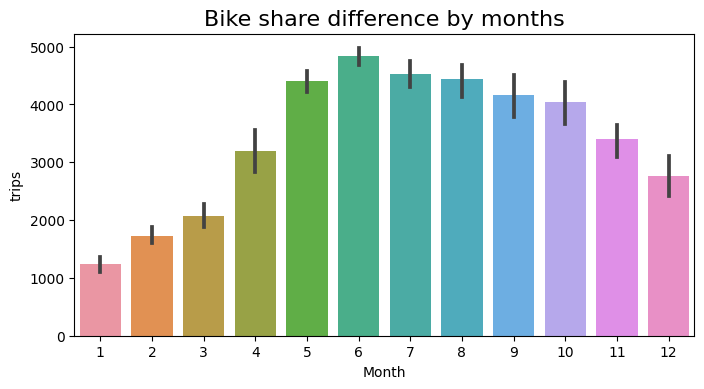

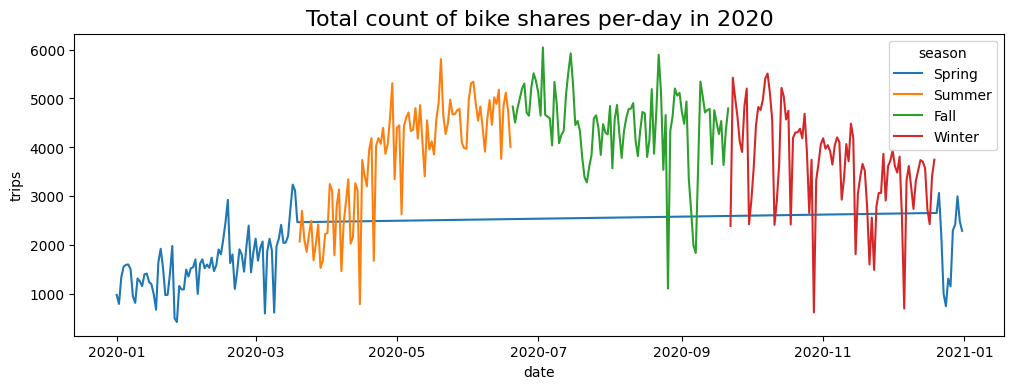

In [8]:
# Get the bike share difference by months
plt.figure(figsize=(8,4), dpi=100)
sns.barplot(x="Month", y="trips", data=filtered_df);
plt.title('Bike share difference by months',fontsize=16)
plt.show()


# Get the time-line from January to Dec 2020 (per-day) based on season to see the trend
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=filtered_df, x="date", y="trips", hue="season")
plt.title("Total count of bike shares per-day in 2020", fontsize=16)
plt.show()

- That two graphs show the bike share numbers across the time.
- We can see that in bike share numbers around the summer, they are increasing towards the first of Winter
- There is a popular day, we can see a spike in the Fall, especially on the first of July
- It's clear that bike share numbers are less in the Springtime
- Spring is the first season of the year, which comes after Winter. Winter has the coldest weather conditions. Whereas, Spring has warm weather conditions. Why?

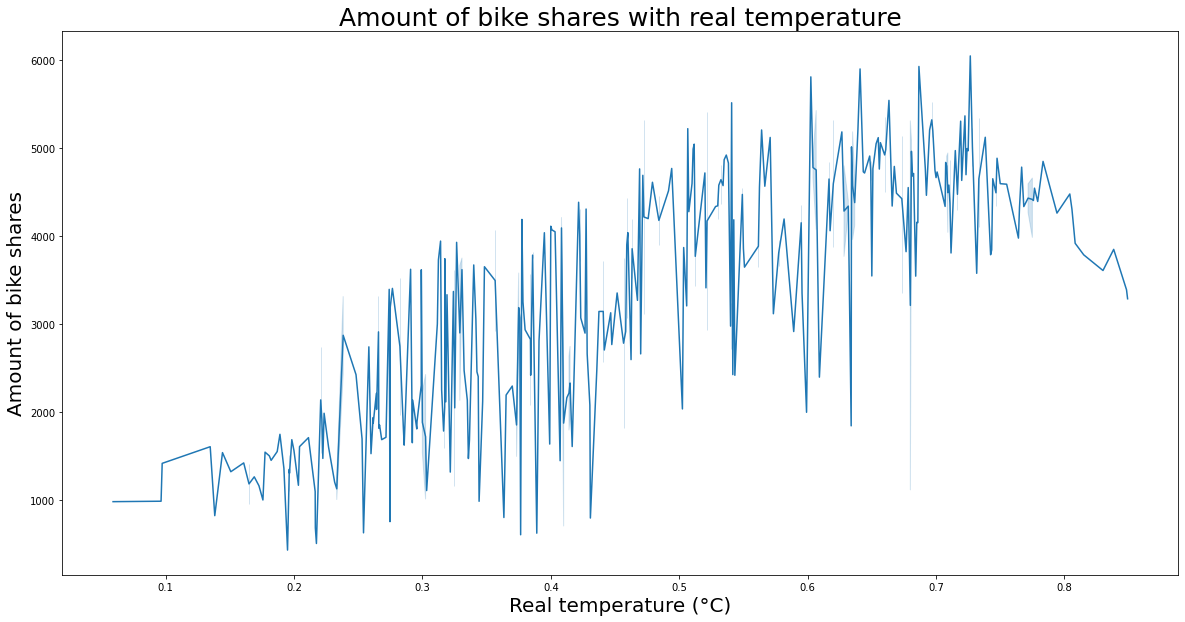

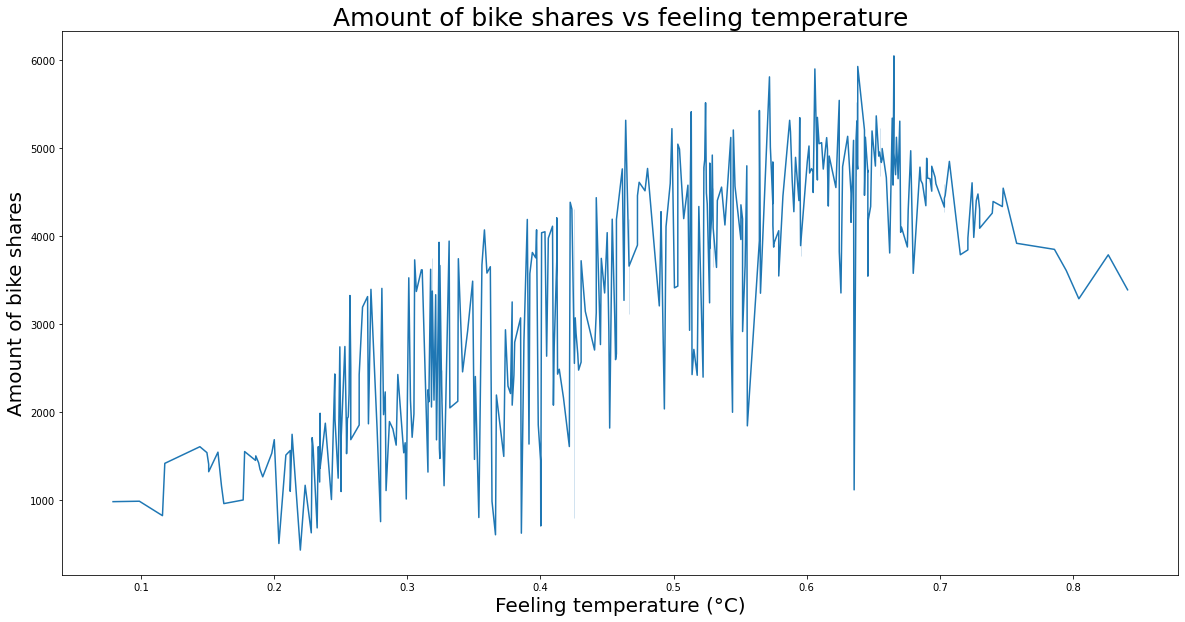

In [9]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='temp', y='trips',data=filtered_df)
ax.set_title("Amount of bike shares with real temperature", fontsize=25)
ax.set_xlabel("Real temperature (°C)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.lineplot(x='atemp', y='trips',data=filtered_df)
ax.set_title("Amount of bike shares vs feeling temperature", fontsize=25)
ax.set_xlabel("Feeling temperature (°C)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)
plt.show()

- We can see that bike share numbers are increasing when the temperature is high
- Even when the temperature is low, the bike share numbers are high unless it's the lowest temperature and when it hits the highest temperature the bike share numbers temp to decrease but still high(let's categorized them to the extreme temperature)

<h3><font size=3>Q:How are holidays having an effect on the overall trip count?</font></h3>

<AxesSubplot:xlabel='date', ylabel='trips'>

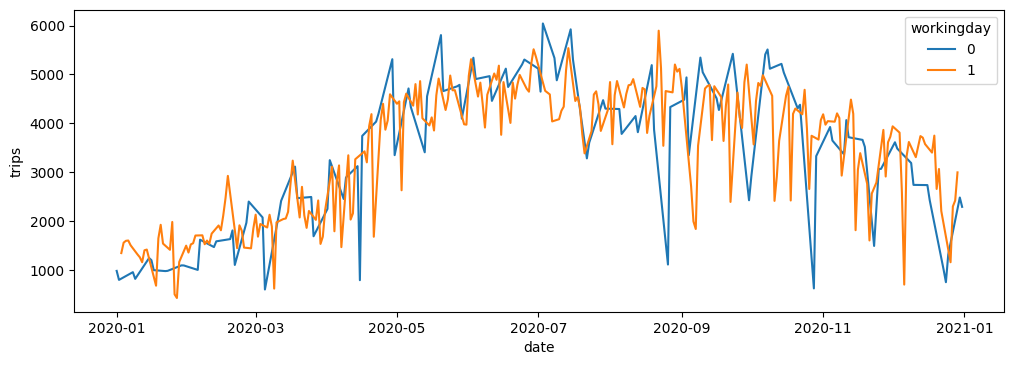

In [10]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=filtered_df, x="date", y="trips", hue="workingday")

Customer behaviour is simple, they rent bike when it's working day and not working day (they rent when they want to)

<AxesSubplot:xlabel='date', ylabel='trips'>

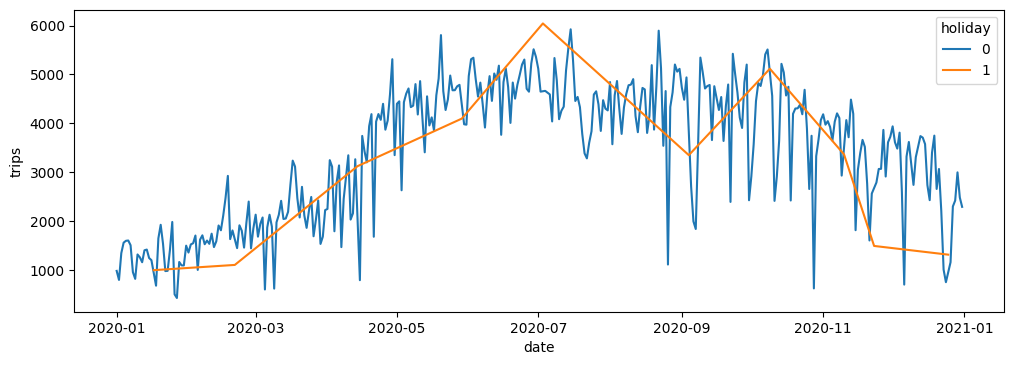

In [11]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=filtered_df, x="date", y="trips", hue="holiday")

On a holiday, it doesn't change the bike share that much. The behavior of the customers who rent bikes are rent when they want, which means they rent not because of work but they want to.

I think it would be different if the customers are renting bikes because they need to work. If they rent bikes because they need to work, when holiday comes the bike share numbers would decrease, in the chart, we can see the reverse of the customer's behavior 

<h3><font size=3>Q:Does weather have an affect on the trip share count ?</font></h3>

Text(0.5, 1.0, 'Bike share difference by weather')

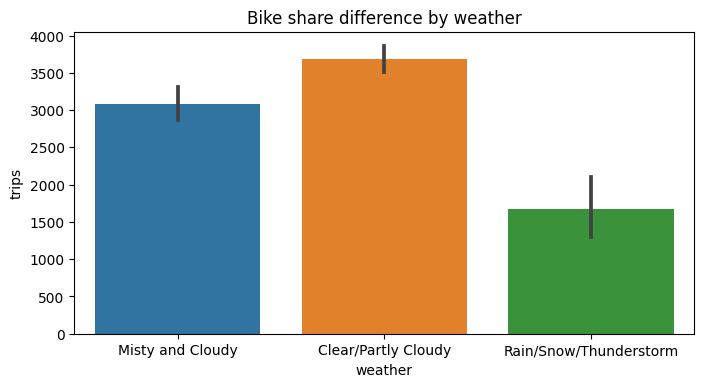

In [12]:
plt.figure(figsize=(8,4), dpi=100)
sns.barplot(x="weather", y="trips", data=filtered_df);
plt.title('Bike share difference by weather')

The barplot clearly shows that when the weather is good, bike shares are increasing, when the weather is bad(Rain/Snow/Thunderstorm) fewer bikes are rented. 
That makes sense, because we're talking about the bike, we can't protect ourself from rain/snow/thunderstorm on a bike

Misty and cloudy are categorized a little good. When it's misty out, there's a heavy fog. The air is thick with moisture, and there's just barely a light rain, but customers don't have to cover themselves from the fog and light rain like they need to cover themselves from rain/thunderstorms. It makes sense

<h3><font size=3>Q:Is there a significant difference in the ridership trend based on the membership type i.e. casual member or registered member?</font></h3>

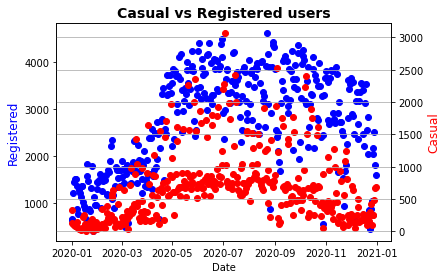

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.scatter(filtered_df['date'], filtered_df['registered'], color='b')
ax2.scatter(filtered_df['date'], filtered_df['casual'], color='r')
plt.title('Casual vs Registered users', fontdict={'fontweight':'bold','fontsize':14})
ax1.set_xlabel('Date',)
ax1.set_ylabel('Registered', color='b', size=12)
ax2.set_ylabel('Casual', color='r', size=12)

plt.grid()
plt.show()

There is a significant difference in the ridership trend based on the membership type i.e. casual member or registered member
- If we take a look at the scatter plot, it shows the comparison between casual and registered member. The scatter plot shows that the trips number of registered members are much higher than casual users
- At some point, we can see that in July there's a high number of casual users "but" it is not higher than registered users

<h3><font size=3>Q:Are there popular days of the week which have higher or lower rideshare trips?</font></h3>

Text(0.5, 1.0, 'Total count of bike share numebrs based on weekday')

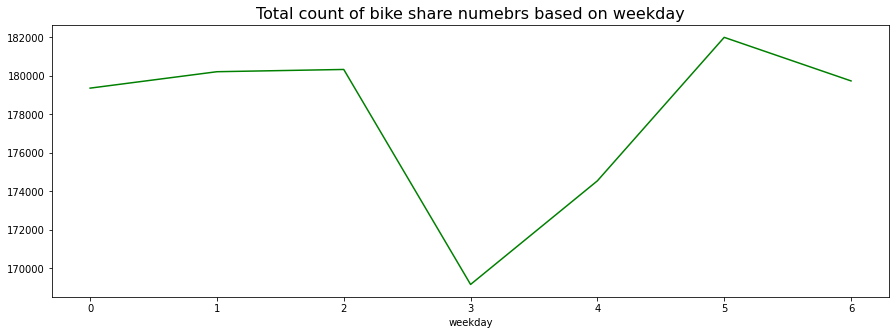

In [14]:
filtered_df.groupby('weekday')['trips'].sum().plot(kind = 'line',figsize = (15,5),color ='g')
plt.title("Total count of bike share numebrs based on weekday", fontsize=16)

- If we look over the timespan from one week, we can see that on Wednesday bike-share dropped heavily. I think that's because of the behaviour of the customers who rent when they want to
- Friday has the highest bike share numbers from one week
- Saturday, Sunday, Monday, and Tuesday have stable bike share numbers

<h3>3. Conclusion</h3>
- Our customers tend to rent a bike around the Summer and increasing towards the first Winter
- Temperature has an effect on customers, bike share numbers are increasing when the temperature is high. Bike share numbers are scrimpy in the lowest temperature, also when the temperature reaches the highest temperature, bike share numbers tend to decrease (but still high)
- Holidays don't have a high effect on the bike share numbers. Basically, it has similar bike share numbers with normal days (we can say that holidays don't have a good correlation with bike share numbers/trips). 
- In the working days and not working days, they have similar amount of trips, meaning that working days or not, it doesn't affect the bike share numbers 
- Bike share numbers tend to increase when the weather is good(Clear/Partly Cloudy weather) and a little good weather like misty/cloudy
- When the weather is bad(Rain/Snow/Thunderstorm), bike share numbers are low
- There is a significant difference in the ridership trend based on the membership type i.e. casual member or a registered member. The trips number of registered members are much higher than casual user
- Friday has higher rideshare trips than other days,
- Wednesday has lowest rideshare trips than other days